<a href="https://colab.research.google.com/github/NetizenCodes/-netizen-ai-notebook/blob/main/ML_iris_flower_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOTEBOOK SETUP**

In [10]:
!which python

/usr/local/bin/python


In [11]:
#third party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [12]:
sns.set()

**LOAD DATA**

In [13]:
data=datasets.load_iris()

In [14]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
print(data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [16]:
data["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
#data.feature_names

data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

we're trying to use attributes of flowers to predict the species of the flower

"A MULTI-CLASS CLASSIFICATION PROBLEM"

#Create a pandas DataFrame from the data


In [18]:
df=pd.DataFrame(data["data"], columns=data["feature_names"])

In [19]:
#create new column with target mappped to the species name
df["target"]=data["target"]
df["target_name"]=df["target"].map({0:"setosa", 1:"versicolor", 2:"verginica"})

In [20]:
print(df.head)

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

#Basic descriptive statics


In [21]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#Distribution of features and target


Text(0.5, 0.98, 'sepal length (cm)')

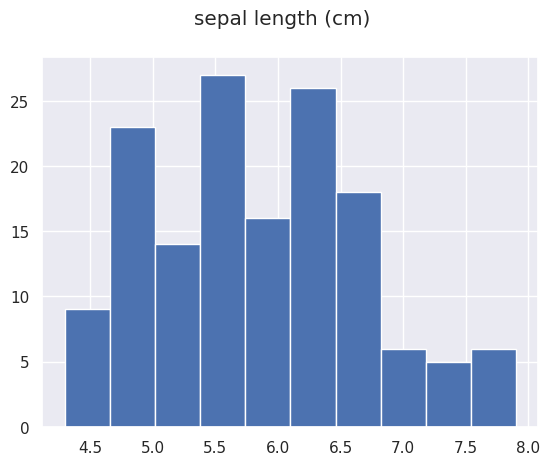

In [22]:
df["sepal length (cm)"].hist()
plt.suptitle("sepal length (cm)")

Text(0.5, 0.98, 'sepal width (cm)')

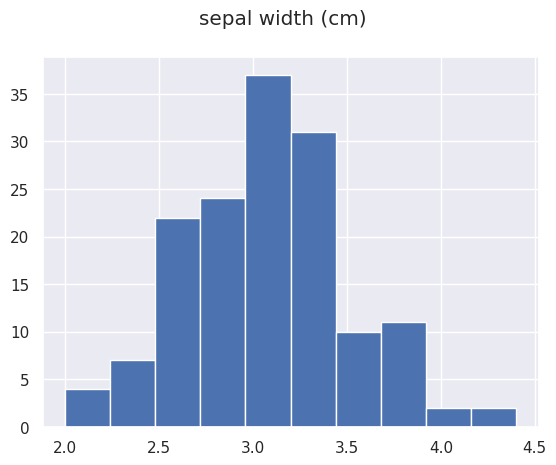

In [23]:
df["sepal width (cm)"].hist()
plt.suptitle("sepal width (cm)")

Text(0.5, 0.98, 'petal length (cm)')

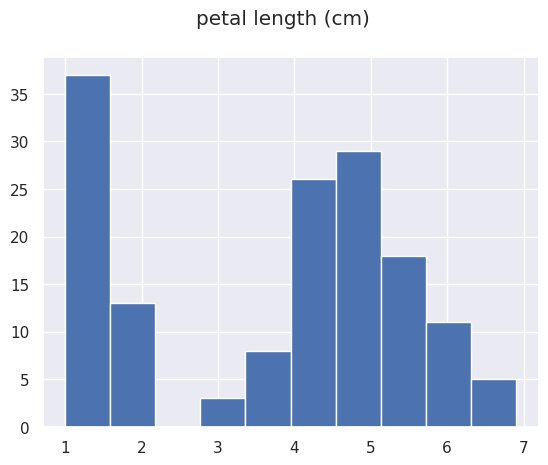

In [24]:
df["petal length (cm)"].hist()
plt.suptitle("petal length (cm)")

Text(0.5, 0.98, 'petal width (cm)')

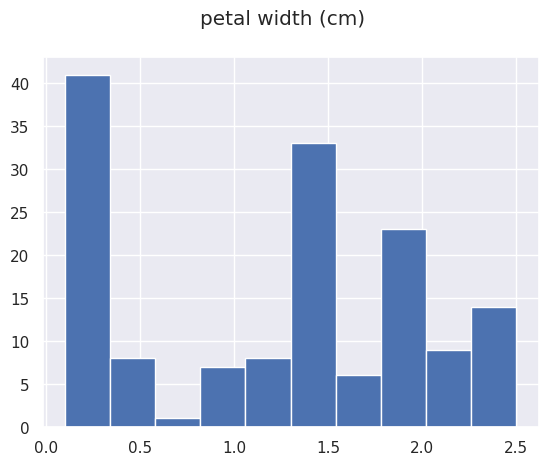

In [25]:
df["petal width (cm)"].hist()
plt.suptitle("petal width (cm)")

#Relationship of the features with the target

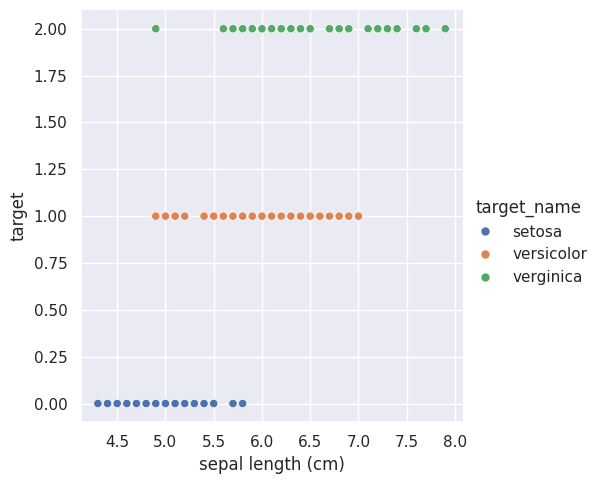

In [26]:
col="sepal length (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)

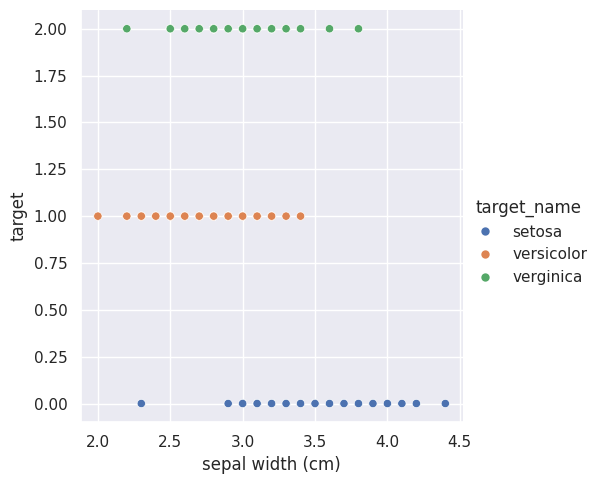

In [27]:
sns.relplot(x="sepal width (cm)", y="target", hue="target_name", data=df)

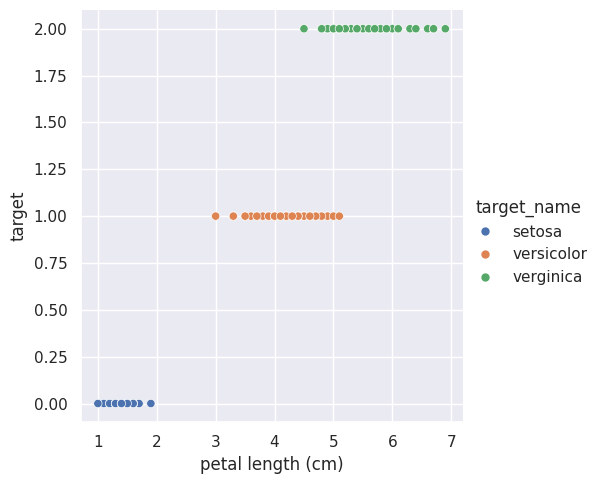

In [28]:
sns.relplot(x="petal length (cm)", y="target", hue="target_name", data=df)

#Exploratory data analysis(EDA) Pairplots

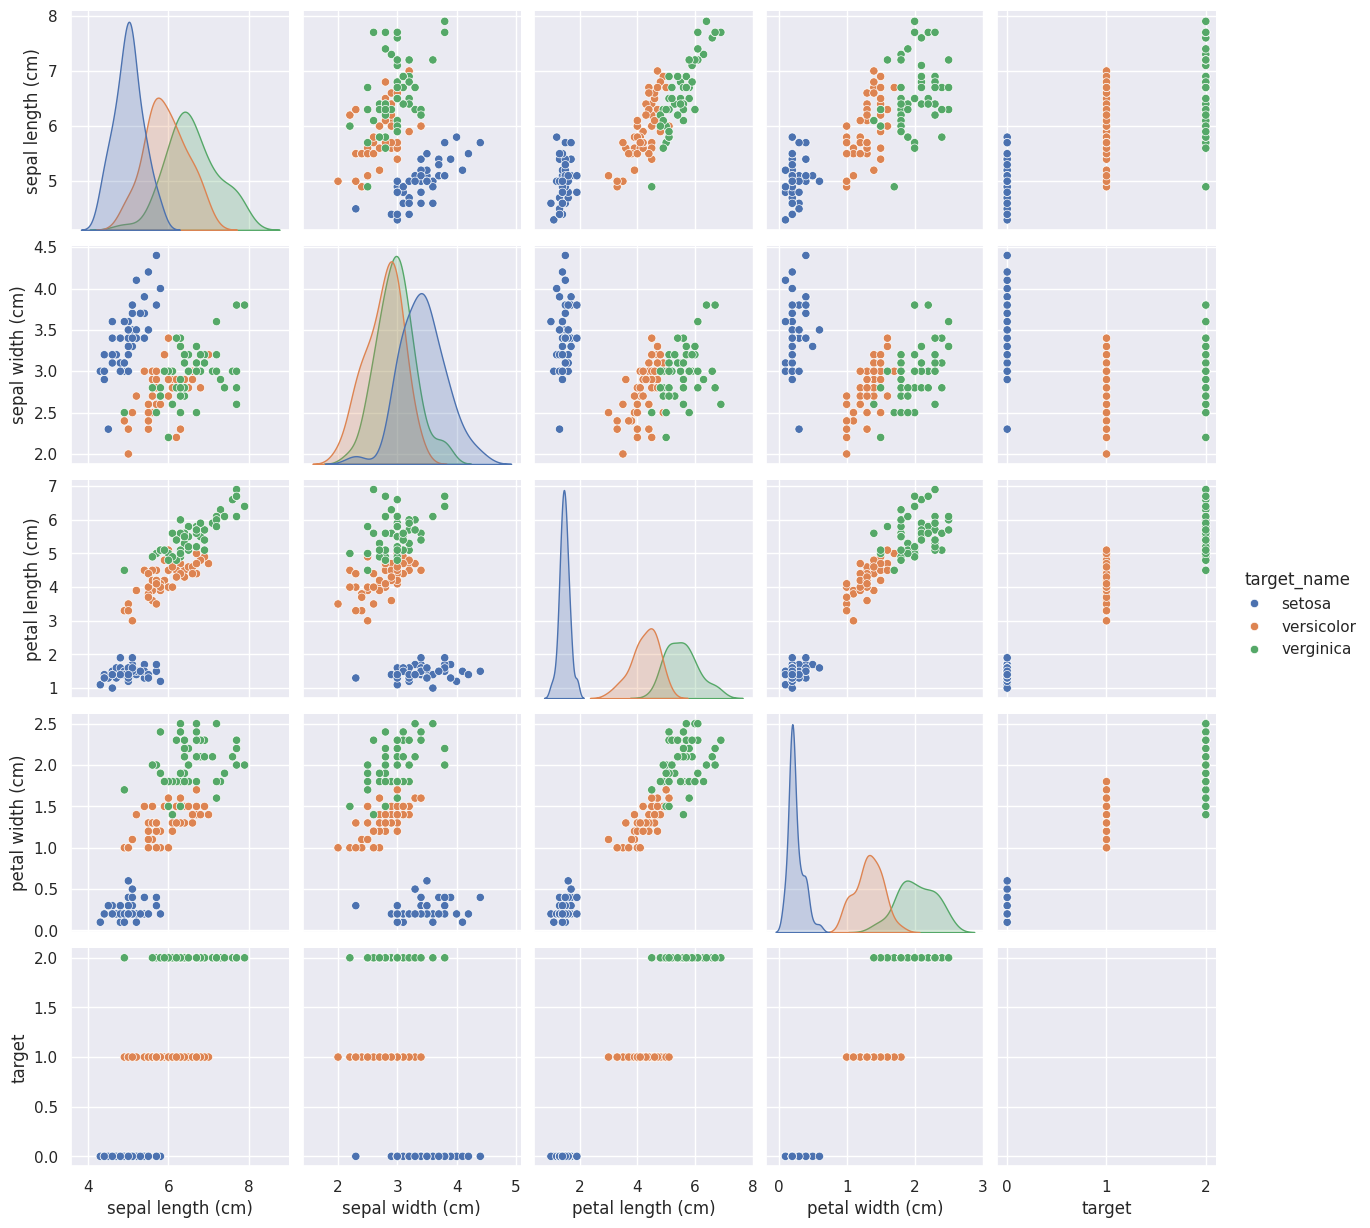

In [29]:
sns.pairplot(df, hue="target_name")

#Train test split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
df_train, df_test=train_test_split(df, test_size=0.25)


In [32]:
df_test.shape

(38, 6)

#Prepare our data for modelling

In [33]:
x_train=df_train.drop(columns=["target","target_name"]).values
y_train=df_train["target"].values

Modelling-What is our baseline-if our model were to randomly guess the species of flower, our accuracy would be 33%...so our model should at least beat 33% accuracy

###Simple manual model

In [34]:
def single_feature_prediction(petal_length):
  """Predicts the iris species given the petal_length"""
  if petal_length<2.5:
      return 0
  elif petal_length<4.8:
      return 1
  else:
      return 2


In [36]:
x_train[:, 2]

array([4.5, 1.5, 6.4, 1.4, 1.5, 1.1, 4.4, 3. , 4.8, 4.7, 1.3, 4.1, 4.9,
       5.4, 5.6, 4.5, 1.7, 4.9, 4.7, 4.4, 5.8, 1.4, 5.1, 5.7, 1.3, 5.8,
       1.4, 6.7, 1.7, 3.3, 1.3, 5.2, 4.5, 1.6, 1.5, 1.6, 4.1, 1.5, 1.4,
       4.1, 1.9, 6.6, 5.6, 4.5, 5.5, 4.9, 1.9, 1.3, 6.1, 4.5, 1.5, 1.5,
       6.9, 6.7, 3.9, 1.4, 3.5, 5.7, 4.7, 4. , 5.1, 3.8, 5.1, 4.9, 1.5,
       1.4, 1. , 1.4, 5.7, 5.6, 1.6, 5. , 4.2, 3.7, 5.6, 1.5, 1.2, 1.4,
       1.5, 6.1, 4.8, 3.6, 6.1, 5.6, 6. , 5.5, 3.9, 6. , 1.5, 4.4, 1.3,
       5.3, 4.9, 6.3, 4.6, 4.2, 5. , 3.3, 1.4, 1.3, 5.1, 4.4, 1.4, 1.6,
       1.5, 4. , 1.6, 4.3, 5.9, 5.9, 4.5, 5.3])

In [42]:
manual_y_predictions=np.array([single_feature_prediction(val) for val in x_train[:,2]])

In [50]:
manual_model_accuracy = np.mean(manual_y_predictions==y_train)

In [52]:
print(f"manual model accuracy:{manual_model_accuracy*100:.2f}%")

manual model accuracy:97.32%
